In [37]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from string import punctuation
import numpy as np
from scipy import stats
import pandas as pd

In [6]:
import requests
response = requests.get('https://www.gutenberg.org/files/1514/1514-0.txt')
play = response.text
play = play.split("***")[2]
play = play.replace("\n", " ")
play = play.replace("\r", " ")
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
sent = sent_tokenize(play)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w.lower())

In [48]:
myStopWords = list(punctuation) + stopwords.words('english')

wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i.lower())

In [49]:

completestemmed = [WordNetLemmatizer().lemmatize(w) for w in wordsNoStop]
playWordDist = nltk.FreqDist(w.lower() for w in completestemmed)
print(playWordDist)

<FreqDist with 2807 samples and 9240 outcomes>


In [50]:
  
df_playWordDist = pd.DataFrame.from_dict(playWordDist, orient='index')
df_playWordDist.columns = ['Frequency']
df_playWordDist.index.name = 'Term'
print(df_playWordDist)

             Frequency
Term                  
cover                3
midsummer            1
nightâs            4
dream               16
william              1
...                ...
âscape             1
serpentâs          1
amends               2
liar                 1
restore              1

[2807 rows x 1 columns]


In [51]:
print("Mean: ", df_playWordDist['Frequency'].mean())
print("Mode: ", df_playWordDist['Frequency'].mode())
print("Median: ", df_playWordDist['Frequency'].median())
print("Trimmed mean (10% smallest and largest removed): ", stats.trim_mean(df_playWordDist['Frequency'], 0.1))

Mean:  3.291770573566085
Mode:  0    1
dtype: int64
Median:  1.0
Trimmed mean (10% smallest and largest removed):  1.7530040053404539


<AxesSubplot:ylabel='Frequency'>

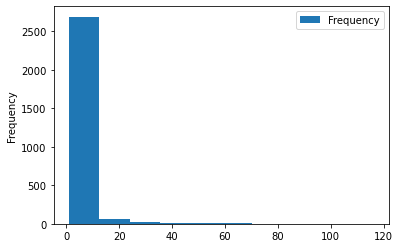

In [52]:
df_playWordDist.plot.hist()

In [53]:
print("Standard Deviation: ", df_playWordDist['Frequency'].std())
qt3, qt1 = np.percentile(df_playWordDist, [75 ,25])
iqr_pwD = qt3 - qt1
print("IQR: ", iqr_pwD)

Standard Deviation:  7.569164098718866
IQR:  2.0


This is in line with the histogram as you can see a large concentration between the 0-10 value of frequency! 

In [69]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

In [70]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [71]:
features_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [72]:
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [73]:
target_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [62]:
target_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [74]:
combine_df = features_df.copy()
combine_df.insert(10, "target", target_df)

In [75]:
combine_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [76]:
combine_df[['age','target']].corr()

,age,target
age,1.000000,0.187889
target,0.187889,1.000000


In [77]:
combine_df[['sex','target']].corr()

,sex,target
sex,1.000000,0.043062
target,0.043062,1.000000


In [78]:
combine_df[['bmi','target']].corr()

,bmi,target
bmi,1.00000,0.58645
target,0.58645,1.00000


In [79]:
combine_df[['bp','target']].corr()

,bp,target
bp,1.000000,0.441484
target,0.441484,1.000000


In [80]:
combine_df[['s1','target']].corr()

,s1,target
s1,1.000000,0.212022
target,0.212022,1.000000


In [81]:
combine_df[['s2','target']].corr()

,s2,target
s2,1.000000,0.174054
target,0.174054,1.000000


In [82]:
combine_df[['s3','target']].corr()

,s3,target
s3,1.000000,-0.394789
target,-0.394789,1.000000


In [83]:
combine_df[['s4','target']].corr()

,s4,target
s4,1.000000,0.430453
target,0.430453,1.000000


In [84]:
combine_df[['s5','target']].corr()

,s5,target
s5,1.000000,0.565883
target,0.565883,1.000000


In [85]:
combine_df[['s6','target']].corr()

,s6,target
s6,1.000000,0.382483
target,0.382483,1.000000


The best correlation is between BMI and the target at 0.58645

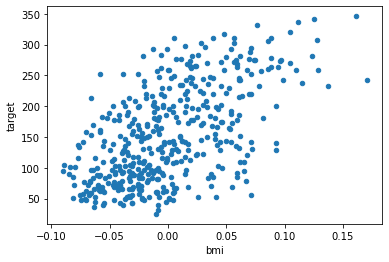

In [88]:
combine_df.plot(kind='scatter',
        x='bmi',
        y='target');

The plotted points seem to create a scattered, but clear upward line indicating there is a positive correlation between the two. 

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
X = combine_df[['bmi']]
y = combine_df['target']

In [90]:
reg = LinearRegression().fit(X, y)
print("Coefficients: ", reg.coef_)

Coefficients:  [949.43526038]


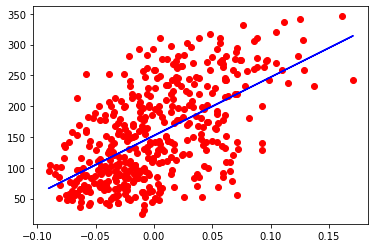

In [91]:
ytrain = reg.intercept_ + reg.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-');

In [92]:
print("Mean squared error: ", mean_squared_error(y, ytrain))
print("R-squared : ", r2_score(y, ytrain))

Mean squared error:  3890.4565854612724
R-squared :  0.3439237602253803


In [96]:
X = combine_df[['age']]
y = combine_df['target']

Coefficients:  [304.18307453]


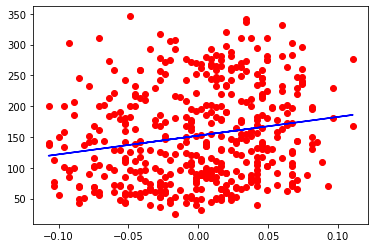

In [97]:
reg2 = LinearRegression().fit(X, y)
print("Coefficients: ", reg2.coef_)
ytrain = reg2.intercept_ + reg2.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-');

In [98]:
print("Mean squared error: ", mean_squared_error(y, ytrain))
print("R-squared : ", r2_score(y, ytrain))

Mean squared error:  5720.5470172056475
R-squared :  0.03530218264671636


You can see the mean squared error increases a lot, and the R-squared lowers. This makes sense because the correlation between age, and our target is much much lower so it is not a good candidate for creating a linear regression model from. 